In [170]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook

In [171]:
inputParameters = pd.read_csv('../_inputParameters.csv',names=['key','value'])
inputParameters



,key,value
0,inputDataFolder,/Users/johannesschoeneberg/git/LatticeTrack/d...
1,outputDataFolder,/Users/johannesschoeneberg/git/LatticeTrack/d...
2,movieLength,70
3,allowedMaxNumDetectionsPerFrame,3000
4,framerate_msec,5689
5,sigma_detectionLoG,2
6,ch0_outputDataFolder,output_488
7,ch0_uniqueFilenameString,_488_
8,ch0_detectionFilename,Detection3D.mat
9,ch0_trackingFilename,trackedFeatures.mat


In [172]:
def getInputParameter(inputParametersPandas,key):
    #this locates the row, gets the result out of its array form and strips whitespaces away
    return (((inputParametersPandas.loc[inputParametersPandas['key'] == key]).values)[0,1]).strip()

In [173]:
resultsFolder = getInputParameter(inputParameters,"outputDataFolder")
trackingCsvFilename = getInputParameter(inputParameters,"ch0_trackingCsvFilenameProcessed")
trackColor = getInputParameter(inputParameters,"ch0_trackColor")
#trackingBildFilename = getInputParameter(inputParameters,"trackingBildFilename")
#framerate_msec = float(getInputParameter(inputParameters,"framerate_msec"))
#movieLength = float(getInputParameter(inputParameters,"movieLength"))
print(trackColor)

#hack
#resultsFolder = "/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/matlab_lsm_tools_aguet/data_560/output/"
#trackColor = "red"

print(resultsFolder)

green
/Users/johannesschoeneberg/git/LatticeTrack/data/test_input/crop_100x100x100/output


In [175]:
path = resultsFolder+'/'+trackingCsvFilename
print(path)
data = pd.read_csv(path,header=0)
data.columns = ["trackId","tracklength","time[s]","frameId","x",'y',"z","A","c","lifetime","catIdx","pval_Ar"]
data[0:5]

/Users/johannesschoeneberg/git/LatticeTrack/data/test_input/crop_100x100x100/output/trackedFeaturesProcessed.csv


,trackId,tracklength,time[s],frameId,x,y,z,A,c,lifetime,catIdx,pval_Ar
0,1,103,0,1,6.359811e+01,7.945264e+01,5.990812e+01,1.012500e+04,4.123262e+03,398.23,8,0.0
1,1,103,5.689000e+00,2,6.544587e+01,7.976917e+01,5.947812e+01,1.128641e+04,3.840400e+03,398.23,8,0.0
2,1,103,1.137800e+01,3,6.437127e+01,7.998812e+01,5.965091e+01,1.095090e+04,3.537787e+03,398.23,8,0.0
3,1,103,1.706700e+01,4,6.436167e+01,8.135014e+01,6.122057e+01,3.522391e+03,3.725799e+03,398.23,8,1.0
4,1,103,2.275600e+01,5,6.435207e+01,8.271215e+01,6.279024e+01,9.740488e+03,3.447415e+03,398.23,8,0.0


In [176]:
len(data)

2725

In [177]:
cat_Ia_Tracks = data[data['catIdx'] == 1]
print(np.unique(cat_Ia_Tracks['trackId']))

[ 26  30  39  58  70  74  76  83  84 107 110 113 114 122 127 138 140 144
 146 156 162 163 167 173 174 176 177 180 181 183 184 189 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244]


In [178]:
trackId = 73
track = data[data['trackId'] == trackId]
track['A'].values.astype(float)

array([ 5298.549,  5786.   ,  3758.015,  3852.857,  5555.096,  5203.548,
        6105.453,  6010.185,  6937.586,  5221.312,  6542.719,  5082.388])

Text(0,0.5,'amplitude')

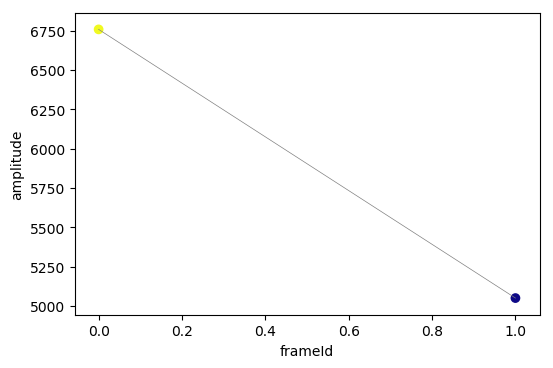

In [179]:
trackId = 239
track = data[data['trackId'] == trackId]
plt.figure(dpi=100)
ax = plt.axes()

# Data for a three-dimensional line
x = track['x'].values.astype(float)
y = track['y'].values.astype(float)
z = track['z'].values.astype(float)
intensity = track['A'].values.astype(float)

# Data for three-dimensional scattered points
#zdata = 15 * np.random.random(100)
#xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
#ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
#ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
#if(color=='intensity'):
#    ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=100);
#else:
ax.plot(intensity,c='grey',lw=0.5)
ax.scatter(range(0,len(intensity)),intensity,c=intensity, cmap='plasma')
plt.xlabel('frameId')
plt.ylabel('amplitude')


Text(0.5,0,'z [px]')

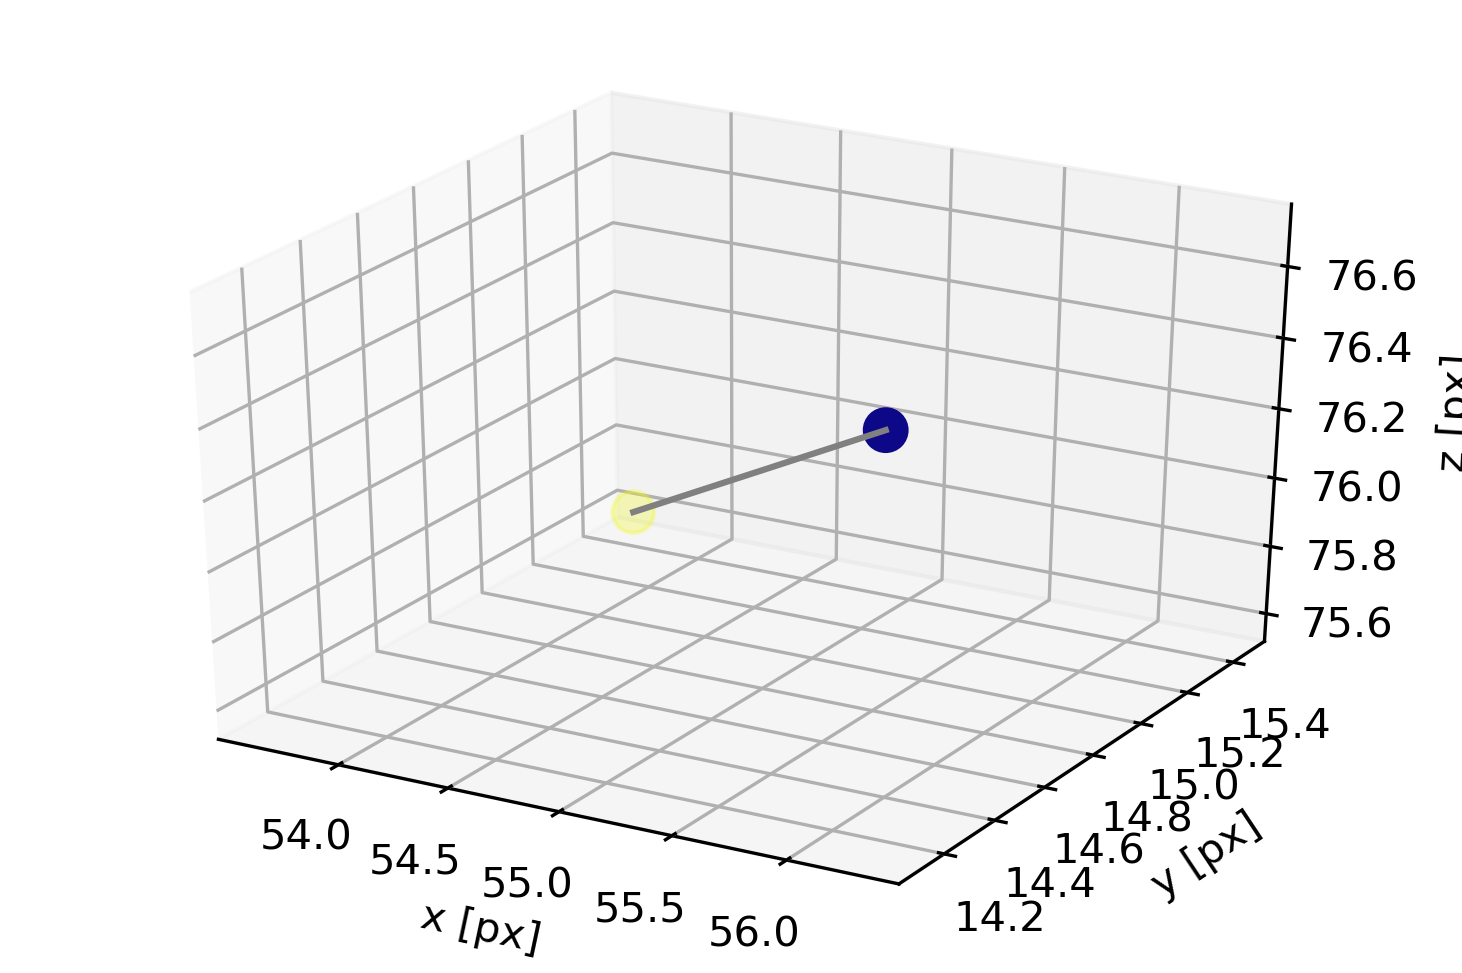

In [180]:

track = data[data['trackId'] == trackId]
plt.figure(dpi=300)
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
x = track['x'].values.astype(float)
y = track['y'].values.astype(float)
z = track['z'].values.astype(float)
intensity = track['A'].values.astype(float)
ax.plot3D(x, y, z, 'grey')

# Data for three-dimensional scattered points
#zdata = 15 * np.random.random(100)
#xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
#ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
#ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
#if(color=='intensity'):
#    ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=100);
#else:
ax.scatter3D(x, y, z,c=intensity, cmap='plasma',s=100);
plt.xlabel('x [px]')
plt.ylabel('y [px]')
ax.set_zlabel('z [px]')

In [181]:
def plotTrack(data,trackId,color='intensity'):
    track = data[data['TrackID'] == trackId]
    plt.figure(dpi=300)
    ax = plt.axes(projection='3d')
    
    # Data for a three-dimensional line
    x = track['Position X'].values
    y = track['Position Y'].values
    z = track['Position Z'].values
    intensity = track['Value'].values
    ax.plot3D(x, y, z, 'gray')
    
    # Data for three-dimensional scattered points
    #zdata = 15 * np.random.random(100)
    #xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
    #ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
    #ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    if(color=='intensity'):
        ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=100);
    else:
        ax.scatter3D(x, y, z, c=color, cmap='cool',s=100);

In [182]:
longtracks = data[data['tracklength'] >= 10]
print('len(longtracks)',len(np.unique(longtracks['trackId'])))
print('len(np.unique(data[\'trackId\'].values))',len(np.unique(data['trackId'].values)))
print(np.unique(longtracks['trackId'].values))

len(longtracks) 85
len(np.unique(data['trackId'].values)) 249
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85]


cat_Ia_Tracks 9
allTracks 85


Text(0.5,0,'z [px]')

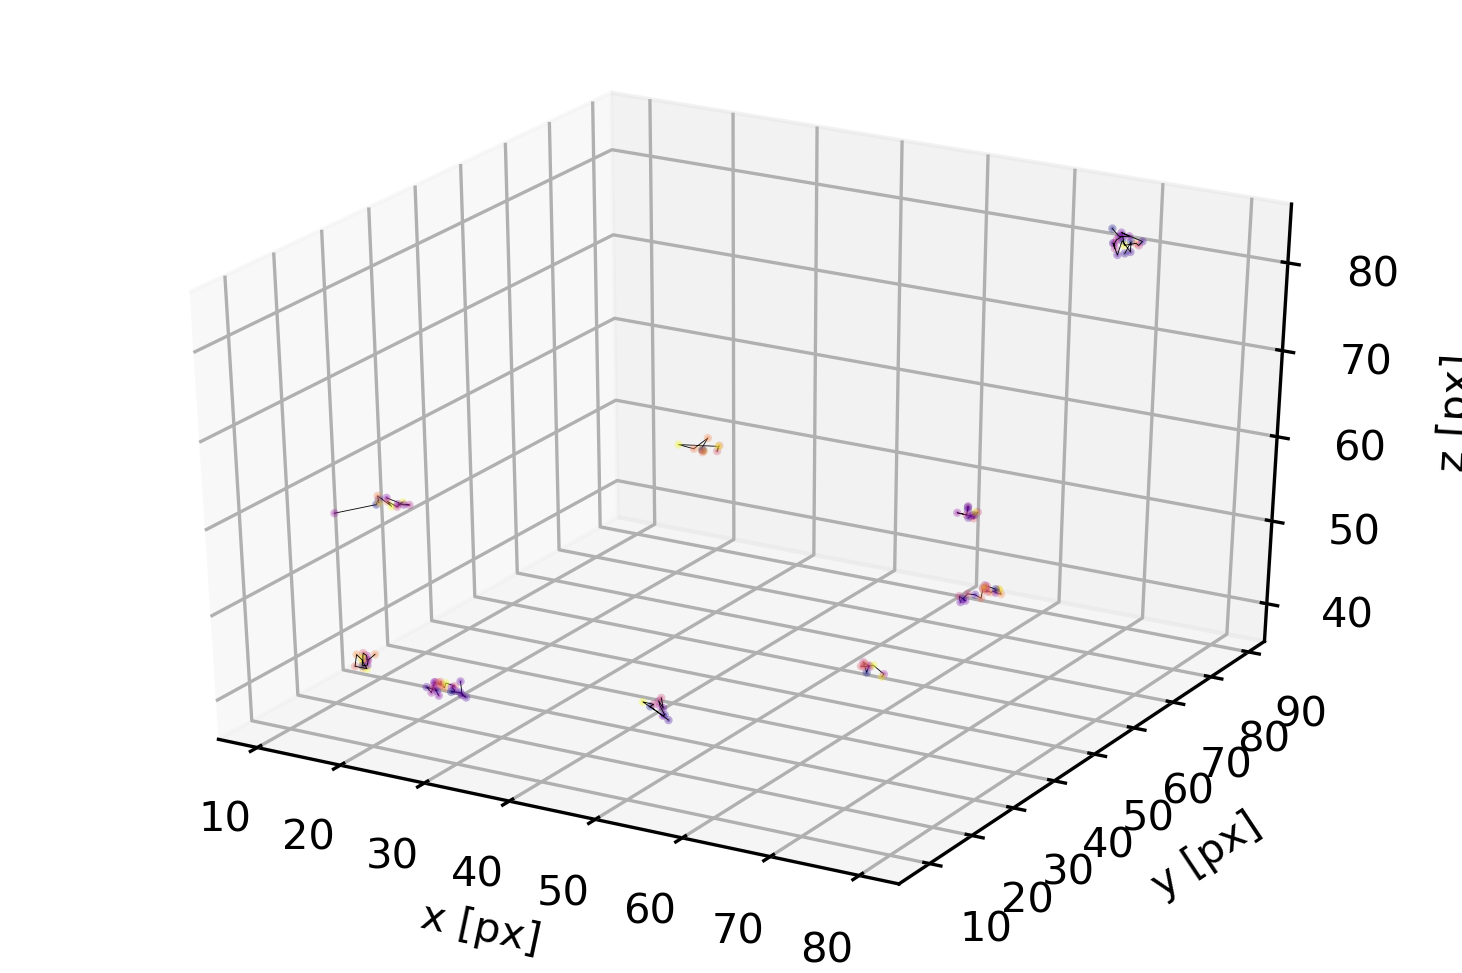

In [190]:
#plot them all

#%----------------------------------------------------------------------------
#    % I. Assign category to each track
#    %----------------------------------------------------------------------------
#    % Categories:
#    % Ia)  Single tracks with valid gaps
#    % Ib)  Single tracks with invalid gaps
#    % Ic)  Single tracks cut at beginning or end
#    % Id)  Single tracks, persistent
#    % IIa) Compound tracks with valid gaps
#    % IIb) Compound tracks with invalid gaps
#    % IIc) Compound tracks cut at beginning or end
#    % IId) Compound tracks, persistent
#    
#    % The categories correspond to index 1-8, in the above order

plt.figure(dpi=300)

data = longtracks

ax = plt.axes(projection='3d')

allTracks = np.unique(data['trackId'].values)
cat_Ia_Tracks = np.unique(data[data['catIdx'] == 1]['trackId'])
cat_Ib_Tracks = np.unique(data[data['catIdx'] == 2]['trackId'])
cat_Ic_Tracks = np.unique(data[data['catIdx'] == 3]['trackId'])
cat_Id_Tracks = np.unique(data[data['catIdx'] == 4]['trackId'])
cat_IIa_Tracks = np.unique(data[data['catIdx'] == 5]['trackId'])
cat_IIb_Tracks = np.unique(data[data['catIdx'] == 6]['trackId'])
cat_IIc_Tracks = np.unique(data[data['catIdx'] == 7]['trackId'])
cat_IId_Tracks = np.unique(data[data['catIdx'] == 8]['trackId'])

print("cat_Ia_Tracks",len(cat_Ia_Tracks))
print("allTracks",len(allTracks))

tracksToDisplay = cat_Ia_Tracks

for trackID in tracksToDisplay:
    
    
    track = data[data['trackId'] == trackID]

    # Data for a three-dimensional line
    x = track['x'].values.astype(float)
    y = track['y'].values.astype(float)
    z = track['z'].values.astype(float)
    intensity = track['A'].values.astype(float)
    ax.plot3D(x, y, z, 'k',lw=0.2)
    ax.scatter3D(x, y, z, c=intensity, cmap='plasma',s=1,alpha=0.3);

ax.set_xlabel('x [px]')
ax.set_ylabel('y [px]')
ax.set_zlabel('z [px]')